# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dyana Gita Pratiwi
- **Email:** gitadyana889@gmail.com
- **ID Dicoding:** MC312D5X0384

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyewaan sepeda dalam satu hari? Pada jam berapa permintaan tertinggi dan terendah?
- Pertanyaan 2: Di musim apa penyewaan sepeda paling banyak?
- Pertanyaan 3: Apakah pengguna terdaftar lebih dipengaruhi oleh kondisi cuaca dibandingkan pengguna kasual?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

In [5]:
# Memuat Tabel Day

day_df = pd.read_csv(r"/content/drive/MyDrive/bike/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Memuat Tabel Hour

hour_df = pd.read_csv(r"/content/drive/MyDrive/bike/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day_df dan hour_df telah berhasil dimuat dengan struktur yang sesuai, mencakup variabel penting seperti tanggal, kondisi cuaca, serta jumlah penyewaan sepeda. Data ini telah siap untuk dilakukan eksplorasi lebih mendalam serta analisis lebih lanjut guna memperoleh wawasan yang lebih komprehensif.

### Assessing Data

#### 1. Menilai Data day_df

In [7]:
# Memeriksa tipe data tiap kolom

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Tipe data pada kolom "dteday" harus diubah ke tipe Datetime untuk memudahkan analisis berbasis waktu (resampling, time-series analysis, dll).

In [8]:
# Menampilkan informasi jumlah missing values dalam setiap kolom

day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- Tidak ditemukan missing value pada setiap kolom sehingga memudahkan dalam menganalisis data.

In [9]:
# Memeriksa Duplikasi Data

print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Duplikasi juga tidak ditemukan sehingga memudahkan dalam menganalisis data.

In [10]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df
# Menampilkan ringkasan parameter statistik (mean, median, dll.)

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight dari Data Bike Sharing (day.csv)**

- Rata-rata penyewaan sepeda per hari adalah **4.504** sepeda, dengan jumlah tertinggi **8.714** sepeda dan terendah **22** sepeda. Sebaran data menunjukkan bahwa 25% hari memiliki penyewaan di bawah **3.152** sepeda, sedangkan 25% hari lainnya memiliki penyewaan lebih dari **5.956** sepeda.

- Kelembaban rata-rata **62,79%**, dengan nilai minimum 0% dan maksimum 97,25%. Kuartil pertama berada di **52%**, dan kuartil ketiga di **73%**, menunjukkan sebagian besar hari memiliki kelembaban sedang hingga tinggi. Jika kelembaban terlalu tinggi, kemungkinan besar penyewaan akan menurun.


- Pengguna kasual menyewa rata-rata **848** sepeda per hari, dengan maksimum **3.410** sepeda dan minimum 2 sepeda. Sementara itu, pengguna terdaftar jauh lebih dominan, dengan rata-rata **3.656** sepeda, maksimum **6.946** sepeda, dan minimum **20** sepeda. Ini menunjukkan bahwa pelanggan tetap lebih konsisten dibanding pengguna kasual.

- Hari libur hanya terjadi **2,87%** dari total hari, sementara hari kerja mencapai **68,4%**. Sebagian besar penyewaan terjadi di hari kerja karena dominasi pengguna terdaftar. Akhir pekan kemungkinan memiliki peningkatan penyewaan oleh pengguna kasual.

- Distribusi musim cukup merata (rata-rata **2,50**), dengan musim panas dan gugur kemungkinan memiliki penyewaan tertinggi, sementara musim dingin lebih rendah. Rata-rata suhu sekitar **49,5%** dari skala normalisasi, dengan minimum **5,9%** dan maksimum **86,2%**. Kecepatan angin juga bervariasi, dengan nilai tertinggi **50,7%** dari skala normalisasi, yang bisa memengaruhi keputusan penyewaan.

#### 2. Menilai Data hour_df

In [11]:
# Memeriksa tipe data tiap kolom

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Tipe data pada kolom "dteday" harus diubah ke tipe Datetime untuk memudahkan analisis berbasis waktu (resampling, time-series analysis, dll).

In [12]:
# Menampilkan informasi jumlah missing values dalam setiap kolom

hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- Tidak ditemukan missing value pada setiap kolom sehingga memudahkan dalam menganalisis data.

In [13]:
# Memeriksa Duplikasi Data

print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Duplikasi juga tidak ditemukan sehingga memudahkan dalam menganalisis data.

In [14]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df
# Menampilkan ringkasan parameter statistik (mean, median, dll.)

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight dari Data Bike Sharing (hour.csv)**

- Rata-rata penyewaan sepeda per jam adalah **189** sepeda, dengan jumlah tertinggi **977** sepeda dan terendah **1** sepeda. Sebanyak 25% dari waktu memiliki penyewaan di bawah **40** sepeda, sedangkan 25% tertinggi memiliki lebih dari **281** sepeda.

- Rata-rata jam penggunaan adalah **11-12 siang**, dengan penyewaan tertinggi pada jam **18.00** (sore) dan terendah pada jam **04.00** (dini hari).

- Kelembaban rata-rata **62,72%**, dengan nilai minimum 0% dan maksimum 100%. Kuartil pertama di **48%**, dan kuartil ketiga di **78%**, menunjukkan sebagian besar penyewaan terjadi saat kelembaban sedang.

- Pengguna kasual menyewa **35** sepeda per jam rata-rata, sedangkan pengguna terdaftar mencapai **153** sepeda. Pengguna terdaftar lebih stabil dibandingkan kasual, yang lebih fluktuatif.

- Musim rata-rata berada di kisaran 2-3, yang berarti musim panas dan gugur memiliki lebih banyak penyewaan. Suhu rata-rata **49,7%** dari skala normalisasi, dengan kecepatan angin tertinggi **85%** dari skala normalisasi, yang dapat memengaruhi keputusan penyewaan.

### Cleaning Data

#### 1. Pemberdihan data day_df

In [15]:
# Mengubah ke tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [16]:
# Cek perubahan tipe data
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#### 2. Pemberdihan data hour_df

In [17]:
# Mengubah ke tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [18]:
# Cek perubahan tipe data
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#### **INSIGHT**

Dataset day_df dan hour_df telah diperbarui dengan tipe data yang lebih sesuai. Kolom dteday telah dikonversi ke format datetime, memungkinkan analisis waktu yang lebih presisi.

## Exploratory Data Analysis (EDA)

### 1. Explore data day_df

In [19]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
# Menghitung rata-rata penyewaan sepeda per musim

season_mapping = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
day_df["season_name"] = day_df["season"].map(season_mapping)
season_trend = day_df.groupby("season_name")["cnt"].mean().reset_index().sort_values(by="cnt", ascending=False)
print(season_trend)

    season_name          cnt
1   Musim Gugur  5644.303191
2   Musim Panas  4992.331522
0  Musim Dingin  4728.162921
3    Musim Semi  2604.132597


In [21]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca

weather_mapping = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Hujan Lebat/Snow"}
day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)
weather_trend = day_df.groupby("weathersit")[["casual", "registered"]].mean().reset_index()
print(weather_trend)

  weathersit      casual   registered
0      Cerah  964.030238  3912.755940
1      Hujan  185.476190  1617.809524
2    Mendung  687.352227  3348.510121


### 2. Explore data hour_df

In [22]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam dalam sehari

hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
print(hourly_trend)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda dalam satu hari? Pada jam berapa permintaan tertinggi dan terendah?

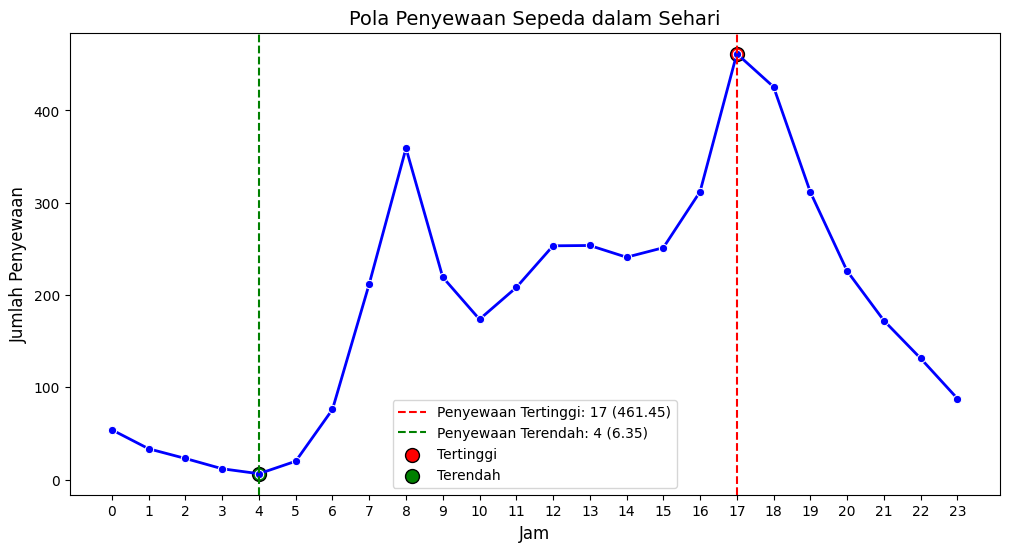

    Kategori  Jam  Jumlah Penyewaan
0  Tertinggi   17        461.452055
1   Terendah    4          6.352941


In [24]:
# VISUALISASI LINE CHART

# Mencari jam dengan penyewaan tertinggi dan terendah
max_hour = hourly_trend.loc[hourly_trend["cnt"].idxmax()]
min_hour = hourly_trend.loc[hourly_trend["cnt"].idxmin()]

# Menampilkan grafik pola penyewaan sepeda dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x="hr", y="cnt", marker="o", color="b", linewidth=2)

# Menambahkan garis vertikal untuk jam dengan penyewaan tertinggi dan terendah
plt.axvline(max_hour["hr"], color='r', linestyle='--', label=f"Penyewaan Tertinggi: {int(max_hour['hr'])} ({max_hour['cnt']:.2f})")
plt.axvline(min_hour["hr"], color='g', linestyle='--', label=f"Penyewaan Terendah: {int(min_hour['hr'])} ({min_hour['cnt']:.2f})")

# Menandai titik maksimum dan minimum di grafik
plt.scatter(max_hour["hr"], max_hour["cnt"], color="r", s=100, label="Tertinggi", edgecolors="black")
plt.scatter(min_hour["hr"], min_hour["cnt"], color="g", s=100, label="Terendah", edgecolors="black")

plt.title("Pola Penyewaan Sepeda dalam Sehari", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.show()

# Menampilkan tabel dengan jam penyewaan tertinggi dan terendah
summary_df = pd.DataFrame({
    "Kategori": ["Tertinggi", "Terendah"],
    "Jam": [int(max_hour["hr"]), int(min_hour["hr"])],
    "Jumlah Penyewaan": [max_hour["cnt"], min_hour["cnt"]]
})

print(summary_df)

**INSIGHT**

- Penyewaan sepeda mencapai puncaknya pada jam 17 dengan rata-rata 461,45 penyewaan per jam.
- Penyewaan paling sedikit terjadi pada jam 4 dengan hanya 6,35 penyewaan per jam.
- Grafik menunjukkan pola berbentuk U/W, dengan kenaikan signifikan di pagi dan sore hari, menunjukkan adanya dua puncak aktivitas.

### Pertanyaan 2: Di musim apa penyewaan sepeda paling banyak?

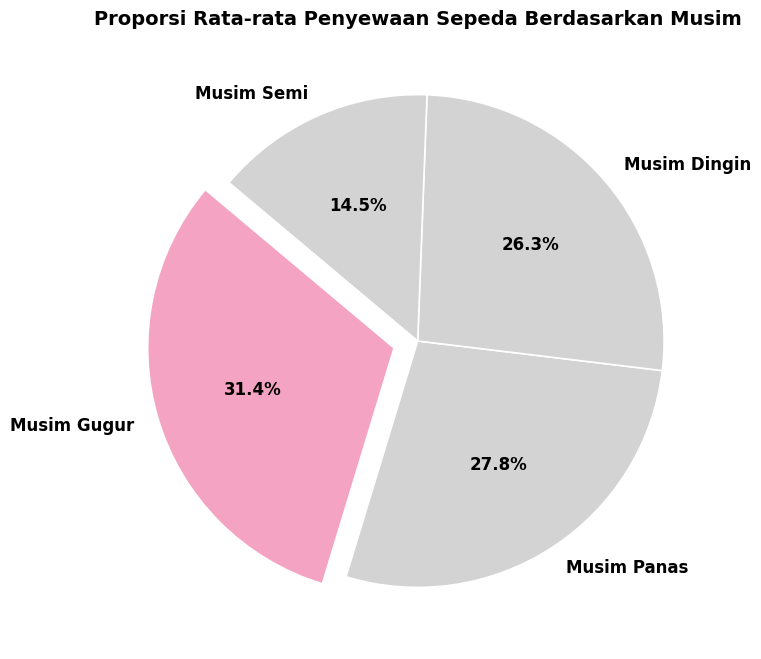

In [25]:
# VISUALISASI PIE CHART

# Memillih Warna
highlight_color = "#F4A3C2"
default_color = "#D3D3D3"

# Mentukan warna tiap musim
season_colors = [highlight_color if season == season_trend.iloc[0]["season_name"] else default_color for season in season_trend["season_name"]]

# Menghighlight musim dengan penyewaan tertinggi
explode = [0.1 if season == season_trend.iloc[0]["season_name"] else 0 for season in season_trend["season_name"]]

# Membuat plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_trend["cnt"], labels=season_trend["season_name"], autopct="%1.1f%%",
        colors=season_colors, startangle=140, explode=explode, wedgeprops={"edgecolor": "white", "linewidth": 1.2},
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})

plt.title("Proporsi Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14, fontweight="bold", ha='center')

plt.show()

- Musim Gugur memiliki proporsi tertinggi yakni 31,3%.
- Musim Semi memiliki penyewaan terendah, hanya sekitar 2604 penyewaan per hari.


### Pertanyaan 3: Apakah pengguna terdaftar lebih dipengaruhi oleh kondisi cuaca?

<Figure size 1000x600 with 0 Axes>

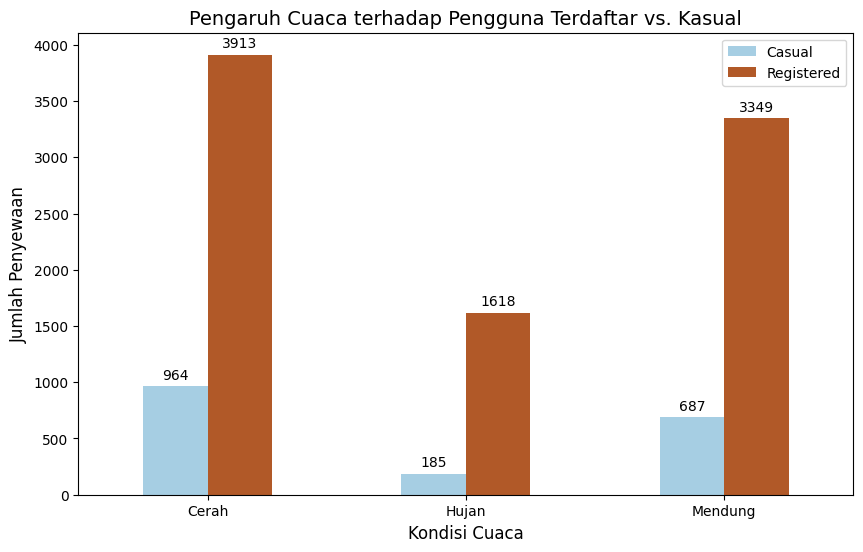

In [26]:
# VISUALISASI BAR CHART

# Membuat Kerangka
plt.figure(figsize=(10, 6))
ax = weather_trend.set_index("weathersit").plot(kind="bar", stacked=False, colormap="Paired", figsize=(10, 6))

# Memuat nilai pada batang
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, padding=3)

# Membuat Plot
plt.title("Pengaruh Cuaca terhadap Pengguna Terdaftar vs. Kasual", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Casual", "Registered"])
plt.show()


INSIGHT

- Pengguna terdaftar (registered) memiliki jumlah penyewaan yang lebih tinggi dalam segala kondisi cuaca.
- Total penyewaan tertinggi terjadi saat cuaca cerah dengan dominasi oleh pengguna terdaftar (3913).

## Analisis Lanjutan (CLUSTERING)

In [27]:
# Fungsi untuk mengelompokkan jumlah permintaan sewa ke dalam beberapa kategori
def k_permintaan(cnt):
    if cnt < 3000:
        return "Rendah"
    elif 3000 <= cnt <= 6000:
        return "Sedang"
    else:
        return "Tinggi"

# Menambahkan kolom baru dengan nama 'cluster' berdasarkan jumlah permintaan sewa
day_df["cluster"] = day_df["cnt"].apply(k_permintaan)

# Menampilkan jumlah data dalam setiap kategori
print(day_df["cluster"].value_counts())

# Menampilkan beberapa contoh data dengan kategori permintaan
day_df.head()

cluster
Sedang    379
Tinggi    180
Rendah    172
Name: count, dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,cluster
0,1,2011-01-01,1,0,1,0,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985,Musim Semi,Rendah
1,2,2011-01-02,1,0,1,0,0,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801,Musim Semi,Rendah
2,3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Musim Semi,Rendah
3,4,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Musim Semi,Rendah
4,5,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Musim Semi,Rendah


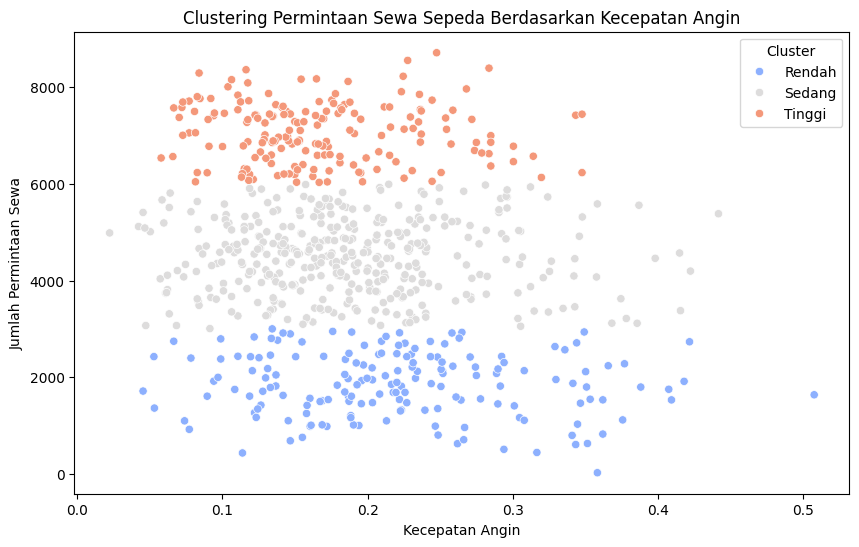

In [28]:
# Visualisasi Scatterplot
# Hubungan Jumlah Permintaan Sewa dan Kelembaban

plt.figure(figsize=(10,6))
sns.scatterplot(x=day_df["windspeed"], y=day_df["cnt"], hue=day_df["cluster"], palette="coolwarm")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Permintaan Sewa")
plt.title("Clustering Permintaan Sewa Sepeda Berdasarkan Kecepatan Angin")
plt.legend(title="Cluster")
plt.show()

**INSIGHT**

- Terlihat bahwa permintaan sewa sepeda cenderung lebih tinggi pada kategori kecepatan angin tinggi, dan sebaliknya, lebih rendah pada kategori kecepatan angin rendah.
- Persebaran data menunjukkan adanya variasi permintaan sewa sepeda di setiap kategori kecepatan angin, mengindikasikan faktor lain selain kecepatan angin juga mempengaruhi permintaan.

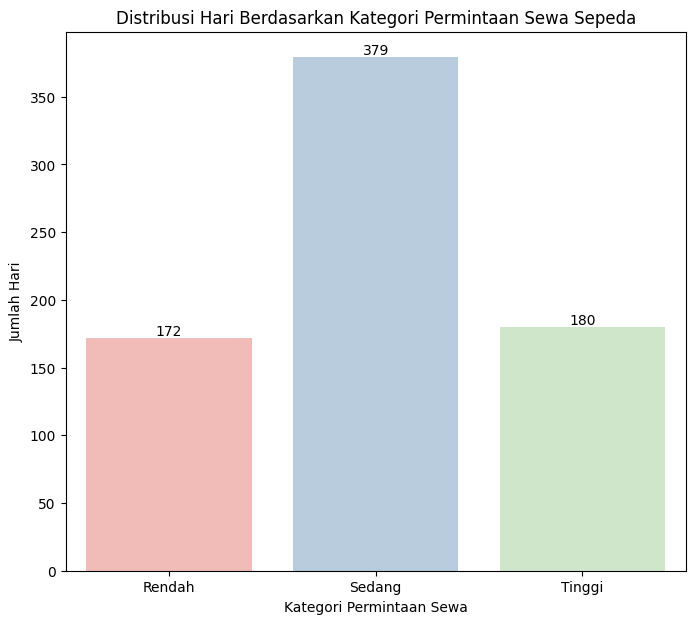

In [29]:
# Visualisasi Bar Chart
# Distribusi Hari Berdasarkan Kategori Permintaan Sewa Sepeda

plt.figure(figsize=(8,7))
ax = sns.countplot(x="cluster", data=day_df, hue="cluster", palette="Pastel1",
                   order=["Rendah", "Sedang", "Tinggi"], legend=False)
plt.title("Distribusi Hari Berdasarkan Kategori Permintaan Sewa Sepeda")
plt.xlabel("Kategori Permintaan Sewa")
plt.ylabel("Jumlah Hari")
for p in ax.patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 2, int(p.get_height()),
             ha="center", fontsize=10)
plt.show()

**INSIGHT**

- Jumlah hari untuk kategori permintaan "Rendah" dan "Tinggi" relatif berimbang, sekitar 170-180 hari.
- Kategori permintaan sewa sepeda "Sedang" adalah yang paling dominan, terjadi pada 379 hari. Hal ini menunjukkan pola permintaan sewa sepeda yang cenderung moderat, dengan kejadian permintaan rendah dan tinggi yang frekuensinya mirip.

## Conclusion

### Pertanyaan 1: Bagaimana pola penyewaan sepeda dalam satu hari? Pada jam berapa permintaan tertinggi dan terendah?


#### Pola penyewaan sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 08:00 dan sore hari pukul 17:00, yang kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja.

#### Permintaan tertinggi terjadi pada pukul 17:00 dengan 461 penyewaan, sedangkan permintaan terendah terjadi pada pukul 04:00 dengan hanya 6 penyewaan, kemungkinan karena masih dini hari dan aktivitas luar ruangan rendah.

### Pertanyaan 2: Di musim apa penyewaan sepeda paling banyak?

#### Penyewaan sepeda tertinggi terjadi pada musim gugur dengan proporsi 31.3%, diikuti oleh musim panas dan musim dingin. Hal ini menunjukkan bahwa cuaca di musim gugur lebih mendukung aktivitas bersepeda dibandingkan musim lainnya, kemungkinan karena suhu yang lebih nyaman dan kondisi cuaca yang relatif stabil.

### Pertanyaan 3: Apakah pengguna terdaftar lebih dipengaruhi oleh kondisi cuaca dibandingkan pengguna kasual?

#### Pengguna terdaftar lebih dipengaruhi oleh kondisi cuaca dibandingkan pengguna kasual, terlihat dari penurunan signifikan jumlah penyewaan saat hujan, dari 3913 penyewaan (cerah) menjadi 1618 penyewaan (hujan). Sementara itu, pengguna kasual tetap lebih sedikit secara keseluruhan, tetapi penurunannya tidak sebesar pengguna terdaftar, yang mengindikasikan bahwa pengguna kasual lebih fleksibel terhadap kondisi cuaca.

## LAST ACTION

In [30]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)